<a href="https://colab.research.google.com/github/ChaymaBA/badge-TAV-it-/blob/main/benafia_chayma_3isi_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score


train_data = pd.read_csv('/content/titanic_train.csv')
test_data = pd.read_csv('/content/titanic_test.csv')

In [ ]:
print(train_data.head())
print(train_data.info())
print(train_data.describe())
print(train_data.dtypes)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [ ]:
missing_values = train_data.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
unique_values = train_data.nunique()
print(unique_values)

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


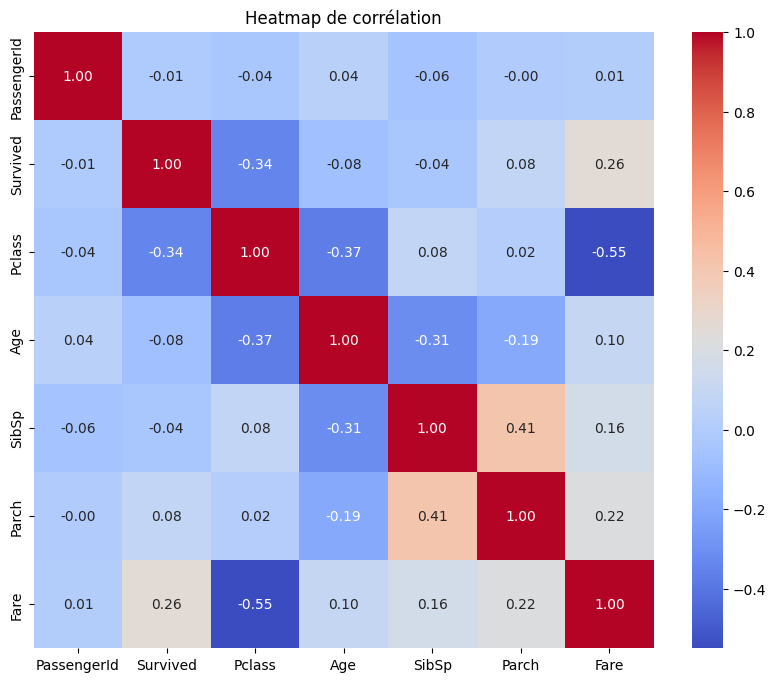

In [ ]:
train_data = pd.read_csv('titanic_train.csv')

# Sélectionner uniquement les colonnes numériques
numerical_data = train_data.select_dtypes(include=['float64', 'int64'])

# Matrice de corrélation
correlation_matrix = numerical_data.corr()

# Visualisation avec heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de corrélation')
plt.show()

In [ ]:
# 1. Suppression des colonnes non pertinentes
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train_processed = train_data.drop(columns=columns_to_drop)
test_processed = test_data.drop(columns=columns_to_drop)
# 2. Gestion des valeurs manquantes avec KNNImputer
imputer = KNNImputer(n_neighbors=5)
numeric_columns = ['Age', 'Fare']
for dataset in [train_processed, test_processed]:
    dataset[numeric_columns] = imputer.fit_transform(dataset[numeric_columns])
# 2.encodage le colone categorique
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
for dataset in [train_processed, test_processed]:
    dataset['Sex'] = le_sex.fit_transform(dataset['Sex'].astype(str))
    dataset['Embarked'] = le_embarked.fit_transform(dataset['Embarked'].fillna('S'))
# 3. Encodage des colonnes catégoriques
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
for dataset in [train_processed, test_processed]:
    dataset['Sex'] = le_sex.fit_transform(dataset['Sex'].astype(str))
    dataset['Embarked'] = le_embarked.fit_transform(dataset['Embarked'].fillna('S'))

# 4. Normalisation des colonnes numériques
scaler = StandardScaler()
for dataset in [train_processed, test_processed]:
    dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])

# 5. Préparation des variables explicatives et cibles
X = train_processed.drop('Survived', axis=1)
y = train_processed['Survived']
X_test_final = test_processed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    #SVM
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    #arebre de desiosion
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5]
        }
    },
    #KNN
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'metric': ['euclidean', 'manhattan']
        }
    },
    #reseau de neurones 
    'Neural Network': {
        'model': MLPClassifier(max_iter=1000),
        'params': {
            'hidden_layer_sizes': [(3,), (6,), (10,)]
        }
    }
}
# Entraînement et validation croisée
best_models = {}
best_scores = {}

for name, model_info in models.items():
    print(f"\nEntraînement du modèle {name}...")
    grid = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_models[name] = grid.best_estimator_
    best_scores[name] = grid.best_score_

    print(f"Meilleurs paramètres : {grid.best_params_}")
    print(f"Score de validation croisée : {grid.best_score_:.4f}")



Entraînement du modèle SVM...
Meilleurs paramètres : {'C': 10, 'kernel': 'rbf'}
Score de validation croisée : 0.8202

Entraînement du modèle Decision Tree...
Meilleurs paramètres : {'max_depth': 3, 'min_samples_split': 2}
Score de validation croisée : 0.8188

Entraînement du modèle KNN...
Meilleurs paramètres : {'metric': 'manhattan', 'n_neighbors': 3}
Score de validation croisée : 0.7963

Entraînement du modèle Neural Network...
Meilleurs paramètres : {'hidden_layer_sizes': (10,)}
Score de validation croisée : 0.8047


In [ ]:
best_model_name = max(best_scores, key=best_scores.get)
best_model = best_models[best_model_name]
print(f"\nMeilleur modèle : {best_model_name}")
print(f"Score : {best_scores[best_model_name]:.4f}")

# Évaluation finale sur l'ensemble de test
y_pred = best_model.predict(X_test)

# Calcul des métriques demandées
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("\nÉvaluation finale des performances :")
print(f"F1-Score : {f1:.4f}")
print(f"Recall : {recall:.4f}")
print(f"Precision : {precision:.4f}")

print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

# Prédictions sur les données de test finales (Titanic Test)
predictions = best_model.predict(X_test_final)



Meilleur modèle : SVM
Score : 0.8202

Évaluation finale des performances :
F1-Score : 0.7626
Recall : 0.7162
Precision : 0.8154

Rapport de classification :
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [ ]:
# Vérifier les colonnes manquantes entre X_train et X_test_final
missing_cols = set(X_train.columns) - set(X_test_final.columns)
if missing_cols:
    print(f"Colonnes manquantes dans les données de test : {missing_cols}")
    raise ValueError("Les colonnes du jeu de données de test ne correspondent pas à celles du modèle.")

# Réordonner les colonnes du jeu de données de test pour correspondre à X_train
X_test_final = X_test_final[X_train.columns]

# Prédictions sur les données de test finales (Titanic Test)
predictions = best_model.predict(X_test_final)

# Ajouter les prédictions au DataFrame des données de test
result = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predictions
})

# Enregistrer les résultats dans un fichier CSV
result.to_csv('benafia_chayma_3isi.csv', index=False)
print("Fichier des résultats enregistré avec succès.")


Fichier des résultats enregistré avec succès.
